In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score, roc_curve, auc

In [2]:
df = pd.read_csv('/home/ubuntu/MIMICmaterialized/oasis.csv')

# Create dataframe with icustay_id and icustay_expire_flag
df_flag = df[['icustay_id', 'icustay_age_group','icustay_expire_flag']].copy()

In [3]:

qsofa = pd.read_csv('/home/ubuntu/MIMICmaterialized/qsofa.csv')
sirs = pd.read_csv('/home/ubuntu/MIMICmaterialized/sirs.csv')
saps = pd.read_csv('/home/ubuntu/MIMICmaterialized/saps.csv')
lods = pd.read_csv('/home/ubuntu/MIMICmaterialized/lods.csv')

In [4]:
qsofa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 7 columns):
subject_id        61532 non-null int64
hadm_id           61532 non-null int64
icustay_id        61532 non-null int64
qsofa             61532 non-null int64
sysbp_score       52254 non-null float64
gcs_score         52143 non-null float64
resprate_score    52229 non-null float64
dtypes: float64(3), int64(4)
memory usage: 3.3 MB


In [18]:
# Merge two dataframes on icustay_id	
sirs_merged = sirs.merge(df_flag, on='icustay_id')

# keep only adult cases
sirs_adult = sirs_merged.loc[sirs_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
sirs_adult_dropped = sirs_adult.dropna().copy()

# create dataframe based on computed scores
sirs_final = sirs_adult_dropped[['temp_score', 'heartrate_score', 'resp_score', 'wbc_score',  \
                                 'icustay_expire_flag']].copy()

# create target variable
y_sirs = sirs_final.pop('icustay_expire_flag')

# create X variable
X_sirs = sirs_final.copy()

# train-test split	
X_train_sirs, X_test_sirs, y_train_sirs, y_test_sirs = train_test_split(X_sirs, y_sirs, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_sirs)
# Train and fit model                                                   
rf_sirs = GradientBoostingClassifier( random_state=0)

rf_sirs.fit(X_train_sirs, y_train_sirs)

# Test Prediction
pred_sirs = rf_sirs.predict(X_test_sirs)
print('Accuracy score: {:.3}'.format(rf_sirs.score(X_test_sirs, y_test_sirs)))

# Get predicted probabilites 	
y_predict_proba_sirs = rf_sirs.predict_proba(X_test_sirs)

# Get predicted probabilites of 1 (Death)
y_proba_sirs = y_predict_proba_sirs[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_sirs, y_proba_sirs)))

# Calculate Standard Mortality Rate (SMR) 
SMR_sirs = sum(y_test_sirs)/sum(pred_sirs)
print('SMR: {:.3}'.format(SMR_sirs))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_sirs = y_proba_sirs - y_test_sirs
squared_sirs = np.square(difference_sirs)
Brier_sirs = np.mean(squared_sirs)
print('Brier Score: {:.3}'.format(Brier_sirs))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_sirs, tpr_sirs, threshold = roc_curve(y_test_sirs, y_proba_sirs)
roc_auc_sirs = auc(fpr_sirs, tpr_sirs)




Accuracy score: 0.917
AUROC: 0.656
SMR: inf
Brier Score: 0.0744


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in long_scalars


In [6]:
print("SAPS")

# Merge two dataframes on icustay_id	
saps_merged = saps.merge(df_flag, on='icustay_id')

# keep only adult cases
saps_adult = saps_merged.loc[saps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
saps_adult_dropped = saps_adult.dropna().copy()

# create dataframe based on computed scores
saps_final = saps_adult_dropped[['age_score', 'hr_score', 'resp_score', 'sysbp_score',  \
				'temp_score', 'uo_score', 'vent_score', 'bun_score', \
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', \
				'sodium_score', 'bicarbonate_score', 'gcs_score', \
                                 'icustay_expire_flag']].copy()

# create target variable
y_saps = saps_final.pop('icustay_expire_flag')

# create X variable
X_saps = saps_final.copy()

# train-test split	
X_train_saps, X_test_saps, y_train_saps, y_test_saps = train_test_split(X_saps, y_saps, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_saps)
# Train and fit model                                                   
rf_saps = RandomForestClassifier(n_estimators = 300, random_state=0,n_jobs=-1)

rf_saps.fit(X_train_saps, y_train_saps)

# Test Prediction
pred_saps = rf_saps.predict(X_test_saps)
print('Accuracy score: {:.3}'.format(rf_saps.score(X_test_saps, y_test_saps)))

# Get predicted probabilites 	
y_predict_proba_saps = rf_saps.predict_proba(X_test_saps)

# Get predicted probabilites of 1 (Death)
y_proba_saps = y_predict_proba_saps[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_saps, y_proba_saps)))

# Calculate Standard Mortality Rate (SMR) 
SMR_saps = sum(y_test_saps)/sum(pred_saps)
print('SMR: {:.3}'.format(SMR_saps))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_saps = y_proba_saps - y_test_saps
squared_saps = np.square(difference_saps)
Brier_saps = np.mean(squared_saps)
print('Brier Score: {:.3}'.format(Brier_saps))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_saps, tpr_saps, threshold = roc_curve(y_test_saps, y_proba_saps)
roc_auc_saps = auc(fpr_saps, tpr_saps)


SAPS
Accuracy score: 0.922
AUROC: 0.818
SMR: 2.86
Brier Score: 0.0634


In [16]:
print("SAPS")

# Merge two dataframes on icustay_id	
saps_merged = saps.merge(df_flag, on='icustay_id')

# keep only adult cases
saps_adult = saps_merged.loc[saps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
saps_adult_dropped = saps_adult.dropna().copy()

# create dataframe based on computed scores
saps_final = saps_adult_dropped[['age_score', 'hr_score', 'resp_score', 'sysbp_score',  \
				'temp_score', 'uo_score', 'vent_score', 'bun_score', \
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', \
				'sodium_score', 'bicarbonate_score', 'gcs_score', \
                                 'icustay_expire_flag']].copy()

# create target variable
y_saps = saps_final.pop('icustay_expire_flag')

# create X variable
X_saps = saps_final.copy()

# train-test split	
X_train_saps, X_test_saps, y_train_saps, y_test_saps = train_test_split(X_saps, y_saps, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_saps)
# Train and fit model                                                   
rf_saps = GradientBoostingClassifier( random_state=0)

rf_saps.fit(X_train_saps, y_train_saps)

# Test Prediction
pred_saps = rf_saps.predict(X_test_saps)
print('Accuracy score: {:.3}'.format(rf_saps.score(X_test_saps, y_test_saps)))

# Get predicted probabilites 	
y_predict_proba_saps = rf_saps.predict_proba(X_test_saps)

# Get predicted probabilites of 1 (Death)
y_proba_saps = y_predict_proba_saps[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_saps, y_proba_saps)))

# Calculate Standard Mortality Rate (SMR) 
SMR_saps = sum(y_test_saps)/sum(pred_saps)
print('SMR: {:.3}'.format(SMR_saps))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_saps = y_proba_saps - y_test_saps
squared_saps = np.square(difference_saps)
Brier_saps = np.mean(squared_saps)
print('Brier Score: {:.3}'.format(Brier_saps))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_saps, tpr_saps, threshold = roc_curve(y_test_saps, y_proba_saps)
roc_auc_saps = auc(fpr_saps, tpr_saps)


SAPS
Accuracy score: 0.926
AUROC: 0.851
SMR: 3.21
Brier Score: 0.0582


In [7]:
# Merge two dataframes on icustay_id	
lods_merged = lods.merge(df_flag, on='icustay_id')

# keep only adult cases
lods_adult = lods_merged.loc[lods_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lods_adult_dropped = lods_adult.dropna().copy()

# create dataframe based on computed scores
lods_final = lods_adult_dropped[['neurologic','cardiovascular','renal','pulmonary','hematologic',\
                         'hepatic', 'icustay_expire_flag']].copy()

# create target variable
y_lods = lods_final.pop('icustay_expire_flag')

# create X variable
X_lods = lods_final.copy()

# train-test split	
X_train_lods, X_test_lods, y_train_lods, y_test_lods = train_test_split(X_lods, y_lods, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lods)
# Train and fit model                                                   
rf_lods = RandomForestClassifier(n_estimators = 300, random_state=0,n_jobs=-1)

rf_lods.fit(X_train_lods, y_train_lods)

# Test Prediction
pred_lods = rf_lods.predict(X_test_lods)
print('Accuracy score: {:.3}'.format(rf_lods.score(X_test_lods, y_test_lods)))

# Get predicted probabilites 	
y_predict_proba_lods = rf_lods.predict_proba(X_test_lods)

# Get predicted probabilites of 1 (Death)
y_proba_lods = y_predict_proba_lods[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lods, y_proba_lods)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lods = sum(y_test_lods)/sum(pred_lods)
print('SMR: {:.3}'.format(SMR_lods))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lods = y_proba_lods - y_test_lods
squared_lods = np.square(difference_lods)
Brier_lods = np.mean(squared_lods)
print('Brier Score: {:.3}'.format(Brier_lods))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lods, tpr_lods, threshold = roc_curve(y_test_lods, y_proba_lods)
roc_auc_lods = auc(fpr_lods, tpr_lods)


Accuracy score: 0.922
AUROC: 0.793
SMR: 4.01
Brier Score: 0.0644


In [8]:
# Merge two dataframes on icustay_id	
lodsYsaps = lods.merge(df_flag, on='icustay_id')

In [9]:
lodsYsaps_merged = lodsYsaps.merge(saps, on='icustay_id')

In [10]:

# keep only adult cases
lodsYsaps_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps_adult_dropped = lodsYsaps_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps_final = lodsYsaps_adult_dropped[['neurologic','cardiovascular','renal','pulmonary','hematologic',
                         'hepatic', 'age_score', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score', 'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps = lodsYsaps_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps = lodsYsaps_final.copy()

# train-test split	
X_train_lodsYsaps, X_test_lodsYsaps, y_train_lodsYsaps, y_test_lodsYsaps = train_test_split(X_lodsYsaps, \
                                                y_lodsYsaps, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps)
# Train and fit model                                                   
rf_lodsYsaps = RandomForestClassifier(n_estimators = 300, random_state=0,n_jobs=-1)

rf_lodsYsaps.fit(X_train_lodsYsaps, y_train_lodsYsaps)

# Test Prediction
pred_lodsYsaps = rf_lodsYsaps.predict(X_test_lodsYsaps)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps.score(X_test_lodsYsaps, y_test_lodsYsaps)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps = rf_lodsYsaps.predict_proba(X_test_lodsYsaps)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps = y_predict_proba_lodsYsaps[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps, y_proba_lodsYsaps)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps = sum(y_test_lodsYsaps)/sum(pred_lodsYsaps)
print('SMR: {:.3}'.format(SMR_lodsYsaps))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps = y_proba_lodsYsaps - y_test_lodsYsaps
squared_lodsYsaps = np.square(difference_lodsYsaps)
Brier_lodsYsaps = np.mean(squared_lodsYsaps)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps, tpr_lodsYsaps, threshold = roc_curve(y_test_lodsYsaps, y_proba_lodsYsaps)
roc_auc_lodsYsaps = auc(fpr_lodsYsaps, tpr_lodsYsaps)


Accuracy score: 0.924
AUROC: 0.844
SMR: 3.19
Brier Score: 0.0608


In [11]:

# keep only adult cases
lodsYsaps_adult = lodsYsaps_merged.loc[lodsYsaps_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
lodsYsaps_adult_dropped = lodsYsaps_adult.dropna().copy()

# create dataframe based on computed scores
lodsYsaps_final = lodsYsaps_adult_dropped[['neurologic','cardiovascular','renal','pulmonary','hematologic',
                         'hepatic', 'age_score', 'hr_score', 'resp_score', 'sysbp_score',  
				'temp_score', 'uo_score', 'vent_score', 'bun_score', 
				'hematocrit_score', 'wbc_score', 'glucose_score', 'potassium_score', 
				'sodium_score', 'bicarbonate_score', 'gcs_score', 'icustay_expire_flag']].copy()

# create target variable
y_lodsYsaps = lodsYsaps_final.pop('icustay_expire_flag')

# create X variable
X_lodsYsaps = lodsYsaps_final.copy()

# train-test split	
X_train_lodsYsaps, X_test_lodsYsaps, y_train_lodsYsaps, y_test_lodsYsaps = train_test_split(X_lodsYsaps, \
                                                y_lodsYsaps, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_lodsYsaps)
# Train and fit model                                                   
rf_lodsYsaps = GradientBoostingClassifier( random_state=0)

rf_lodsYsaps.fit(X_train_lodsYsaps, y_train_lodsYsaps)

# Test Prediction
pred_lodsYsaps = rf_lodsYsaps.predict(X_test_lodsYsaps)
print('Accuracy score: {:.3}'.format(rf_lodsYsaps.score(X_test_lodsYsaps, y_test_lodsYsaps)))

# Get predicted probabilites 	
y_predict_proba_lodsYsaps = rf_lodsYsaps.predict_proba(X_test_lodsYsaps)

# Get predicted probabilites of 1 (Death)
y_proba_lodsYsaps = y_predict_proba_lodsYsaps[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_lodsYsaps, y_proba_lodsYsaps)))

# Calculate Standard Mortality Rate (SMR) 
SMR_lodsYsaps = sum(y_test_lodsYsaps)/sum(pred_lodsYsaps)
print('SMR: {:.3}'.format(SMR_lodsYsaps))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_lodsYsaps = y_proba_lodsYsaps - y_test_lodsYsaps
squared_lodsYsaps = np.square(difference_lodsYsaps)
Brier_lodsYsaps = np.mean(squared_lodsYsaps)
print('Brier Score: {:.3}'.format(Brier_lodsYsaps))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_lodsYsaps, tpr_lodsYsaps, threshold = roc_curve(y_test_lodsYsaps, y_proba_lodsYsaps)
roc_auc_lodsYsaps = auc(fpr_lodsYsaps, tpr_lodsYsaps)


Accuracy score: 0.926
AUROC: 0.864
SMR: 2.88
Brier Score: 0.0579


In [12]:
# Merge two dataframes on icustay_id	
qsofa_merged = qsofa.merge(df_flag, on='icustay_id')

# keep only adult cases
qsofa_adult = qsofa_merged.loc[qsofa_merged['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
qsofa_adult_dropped = qsofa_adult.dropna().copy()

# create dataframe based on computed scores
qsofa_final = qsofa_adult_dropped[['sysbp_score','gcs_score','resprate_score', 'icustay_expire_flag']].copy()

# create target variable
y_qsofa = qsofa_final.pop('icustay_expire_flag')

# create X variable
X_qsofa = qsofa_final.copy()

# train-test split	
X_train_qsofa, X_test_qsofa, y_train_qsofa, y_test_qsofa = train_test_split(X_qsofa, y_qsofa, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_qsofa)
# Train and fit model                                                   
rf_qsofa = RandomForestClassifier(n_estimators = 300, random_state=0,n_jobs=-1)

rf_qsofa.fit(X_train_qsofa, y_train_qsofa)

# Test Prediction
pred_qsofa = rf_qsofa.predict(X_test_qsofa)
print('Accuracy score: {:.3}'.format(rf_qsofa.score(X_test_qsofa, y_test_qsofa)))

# Get predicted probabilites 	
y_predict_proba_qsofa = rf_qsofa.predict_proba(X_test_qsofa)

# Get predicted probabilites of 1 (Death)
y_proba_qsofa = y_predict_proba_qsofa[:,1]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test_qsofa, y_proba_qsofa)))

# Calculate Standard Mortality Rate (SMR) 
SMR_qsofa = sum(y_test_qsofa)/sum(pred_qsofa)
print('SMR: {:.3}'.format(SMR_qsofa))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference_qsofa = y_proba_qsofa - y_test_qsofa
squared_qsofa = np.square(difference_qsofa)
Brier_qsofa = np.mean(squared_qsofa)
print('Brier Score: {:.3}'.format(Brier_qsofa))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))






# calculate the fpr and tpr for all thresholds of the classification

fpr_qsofa, tpr_qsofa, threshold = roc_curve(y_test_qsofa, y_proba_qsofa)
roc_auc_qsofa = auc(fpr_qsofa, tpr_qsofa)


Accuracy score: 0.917
AUROC: 0.613
SMR: inf
Brier Score: 0.0754


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in long_scalars


In [13]:
# keep only adult cases
df_adult = df.loc[df['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE
df_adult_dropped = df_adult.dropna().copy()

# create dataframe based on computed scores
df_scores = df_adult_dropped[['oasis_prob','icustay_id','oasis',\
                              'age_score', 'preiculos_score', 'gcs_score', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score','urineoutput_score', \
                              'mechvent_score','electivesurgery_score', 'icustay_expire_flag']].copy()

# create target variable
y = df_scores['icustay_expire_flag'].copy()

# create X variable
X = df_scores[['age_score', 'preiculos_score', 'gcs_score', 'heartrate_score', \
                              'meanbp_score', 'resprate_score', 'temp_score','urineoutput_score', \
                              'mechvent_score','electivesurgery_score']].copy()


# train-test split	
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y)

# Train and fit model                                                   
rf = RandomForestClassifier(n_estimators = 300, random_state=0,n_jobs=-1)

rf.fit(X_train, y_train)

# Test Prediction
pred = rf.predict(X_test)
print('Accuracy score: {:.3}'.format(rf.score(X_test, y_test)))

# Get predicted probabilites 	
y_predict_proba = rf.predict_proba(X_test)

# Get predicted probabilites of 1 (Death)
y_proba = y_predict_proba[:,1]

# Get Industry standard predictions
y_ind_prob = df_scores.loc[X_test.index]

# Get AUROC score
print('AUROC: {:.3}'.format(roc_auc_score(y_test, y_proba)))

# Calculate Standard Mortality Rate (SMR) 
SMR = sum(y_test)/sum(pred)
print('SMR: {:.3}'.format(SMR))
# (different way) print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
difference = y_proba - y_test
squared = np.square(difference)
Brier = np.mean(squared)
print('Brier Score: {:.3}'.format(Brier))
# (different way) print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))
print('Brier Score [IND]: {:.3}'.format(np.mean(np.square(y_ind_prob['oasis_prob'] - y_test))))


# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Industry standard 
fpr_IND, tpr_IND, threshold = roc_curve(y_test, y_ind_prob['oasis_prob'])
roc_auc_IND = auc(fpr_IND, tpr_IND)

Accuracy score: 0.914
AUROC: 0.802
SMR: 1.92
Brier Score: 0.0692
Brier Score [IND]: 0.0681


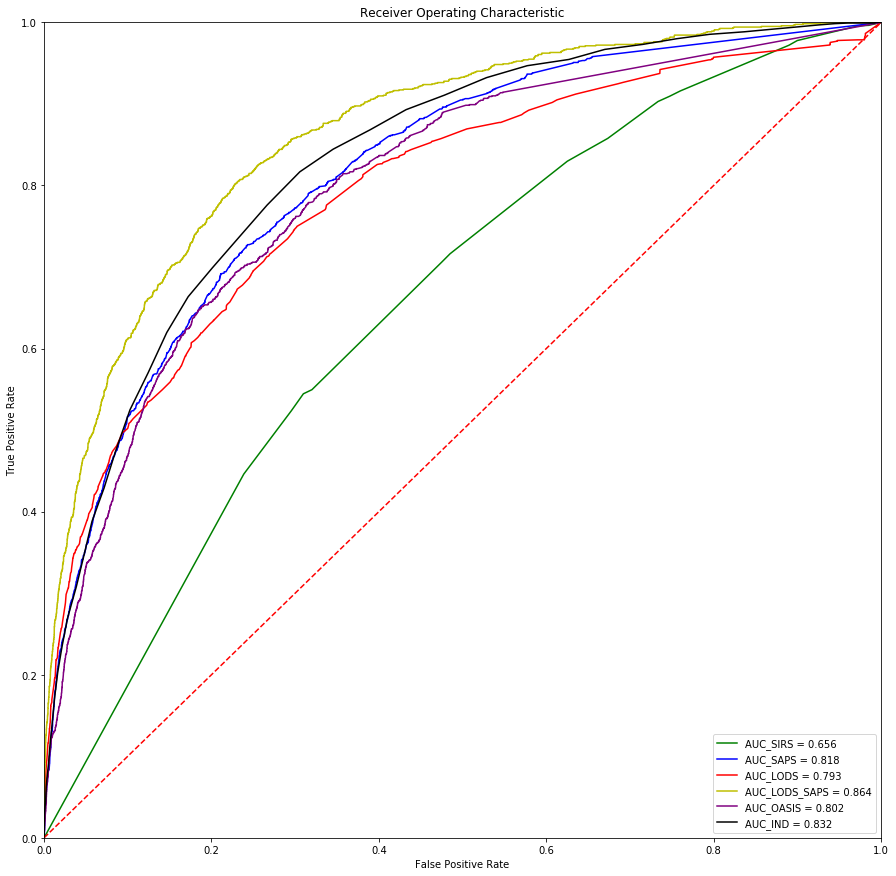

In [14]:
# Plot ROC curves
plt.figure(figsize=(15,15))
plt.title('Receiver Operating Characteristic')

# plt.plot(fpr, tpr, 'b', label = 'AUC_OASIS = %0.3f' % roc_auc)
plt.plot(fpr_sirs, tpr_sirs, 'g', label = 'AUC_SIRS = %0.3f' % roc_auc_sirs)
plt.plot(fpr_saps, tpr_saps, 'b', label = 'AUC_SAPS = %0.3f' % roc_auc_saps)
plt.plot(fpr_lods, tpr_lods, 'r', label = 'AUC_LODS = %0.3f' % roc_auc_lods)
plt.plot(fpr_lodsYsaps, tpr_lodsYsaps, 'y', label = 'AUC_LODS_SAPS = %0.3f' % roc_auc_lodsYsaps)
plt.plot(fpr, tpr, 'purple', label = 'AUC_OASIS = %0.3f' % roc_auc)
plt.plot(fpr_IND, tpr_IND, 'black', label = 'AUC_IND = %0.3f' % roc_auc_IND)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
n = ['a', 'b', 'c']
for i in n:
        globals()['variable_{}'.format(i)] = 0
